# Problem Statement

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# Load the Dataset
df=pd.read_csv(r"G:\shipra\Fliprobo internship\avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# column names
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
# dropping unnameed column from dataset
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
# Rename the columns
df=df.rename(columns={'4046': 'PLU 4046 sold','4225':'PLU 4225 sold','4770':'PLU 4770 sold'})
df

,Date,AveragePrice,Total Volume,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
# Check the shape of datset
df.shape

(18249, 13)

There are 16468 rows and 13 columns in dataset including target variable.

The target column is 'AveragePrice'.

# Feature Description

In [8]:
# Checking the data type of the dataset

df.dtypes

Date              object
AveragePrice     float64
Total Volume     float64
PLU 4046 sold    float64
PLU 4225 sold    float64
PLU 4770 sold    float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type              object
year               int64
region            object
dtype: object

Out of total 13 columns, 9 columns are of float datatype, 1 is of integer datatype and 3 are of object datatype.

Float datatype:

1. AveragePrice
2. Total Volume
3. PLU 4046 sold
4. PLU 4225 sold
5. PLU 4770 sold
6. Total Bags
7. Small Bags
8. Large Bags
9. XLarge BagsAveragePrice

Object datatype:

1. Date
2. type
3. region

In [9]:
# Getting general ideas about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           18249 non-null  object 
 1   AveragePrice   18249 non-null  float64
 2   Total Volume   18249 non-null  float64
 3   PLU 4046 sold  18249 non-null  float64
 4   PLU 4225 sold  18249 non-null  float64
 5   PLU 4770 sold  18249 non-null  float64
 6   Total Bags     18249 non-null  float64
 7   Small Bags     18249 non-null  float64
 8   Large Bags     18249 non-null  float64
 9   XLarge Bags    18249 non-null  float64
 10  type           18249 non-null  object 
 11  year           18249 non-null  int64  
 12  region         18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Observations from the above table:
1. There are no null values in the dataset.
2. 9 out of 13 columns are of float datatype.
3. 3 columns are of object datatype.
4. Only 1 column 'year' is of integer datatype.
5. The target column 'AveragePrice' is of float datatype.

In [10]:
# Checking for the missing values in the dataset

df.isnull().mean()*100

Date             0.0
AveragePrice     0.0
Total Volume     0.0
PLU 4046 sold    0.0
PLU 4225 sold    0.0
PLU 4770 sold    0.0
Total Bags       0.0
Small Bags       0.0
Large Bags       0.0
XLarge Bags      0.0
type             0.0
year             0.0
region           0.0
dtype: float64

There is no missing values in the dataset.

# Feature Engineering

In [11]:
df['Date']= pd.to_datetime(df['Date'])
df['Month']= df['Date'].dt.month
df['Day']=df['Date'].dt.day

df.head()

,Date,AveragePrice,Total Volume,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [12]:
# Dropping 'Date' column from the dataset since we've splitted it into year, month and day.

df = df.drop(['Date'], axis = 1)
df.head()

,AveragePrice,Total Volume,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [13]:
# Checking the Average price of the avacado year-wise.
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

The avrage price of the avacado was highest in the year 2017 and lowest in the year 2016.

In [14]:
#number of Avacado sold in the 4 years type-wise.
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

 in all the years all most equal number of Avocado was sold from both the types.

# Data Visulaization

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

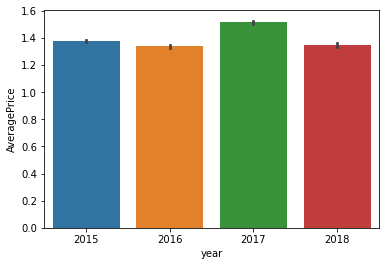

In [15]:
#the distribution of year-wise average price.
sns.barplot(x='year',y='AveragePrice', data=df)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

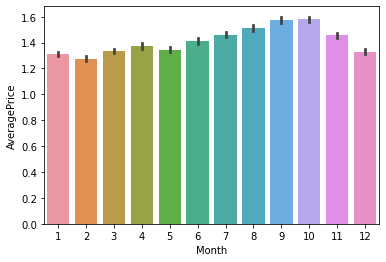

In [16]:
#Average price distribution month wise.
sns.barplot(x='Month',y='AveragePrice', data=df)

1. September and October month have the maximum prices. This may be due to high demand in the month of September and October.
2.Tthe trend of pricing is almost same. This shows that the fruit Avocado is in demand always.

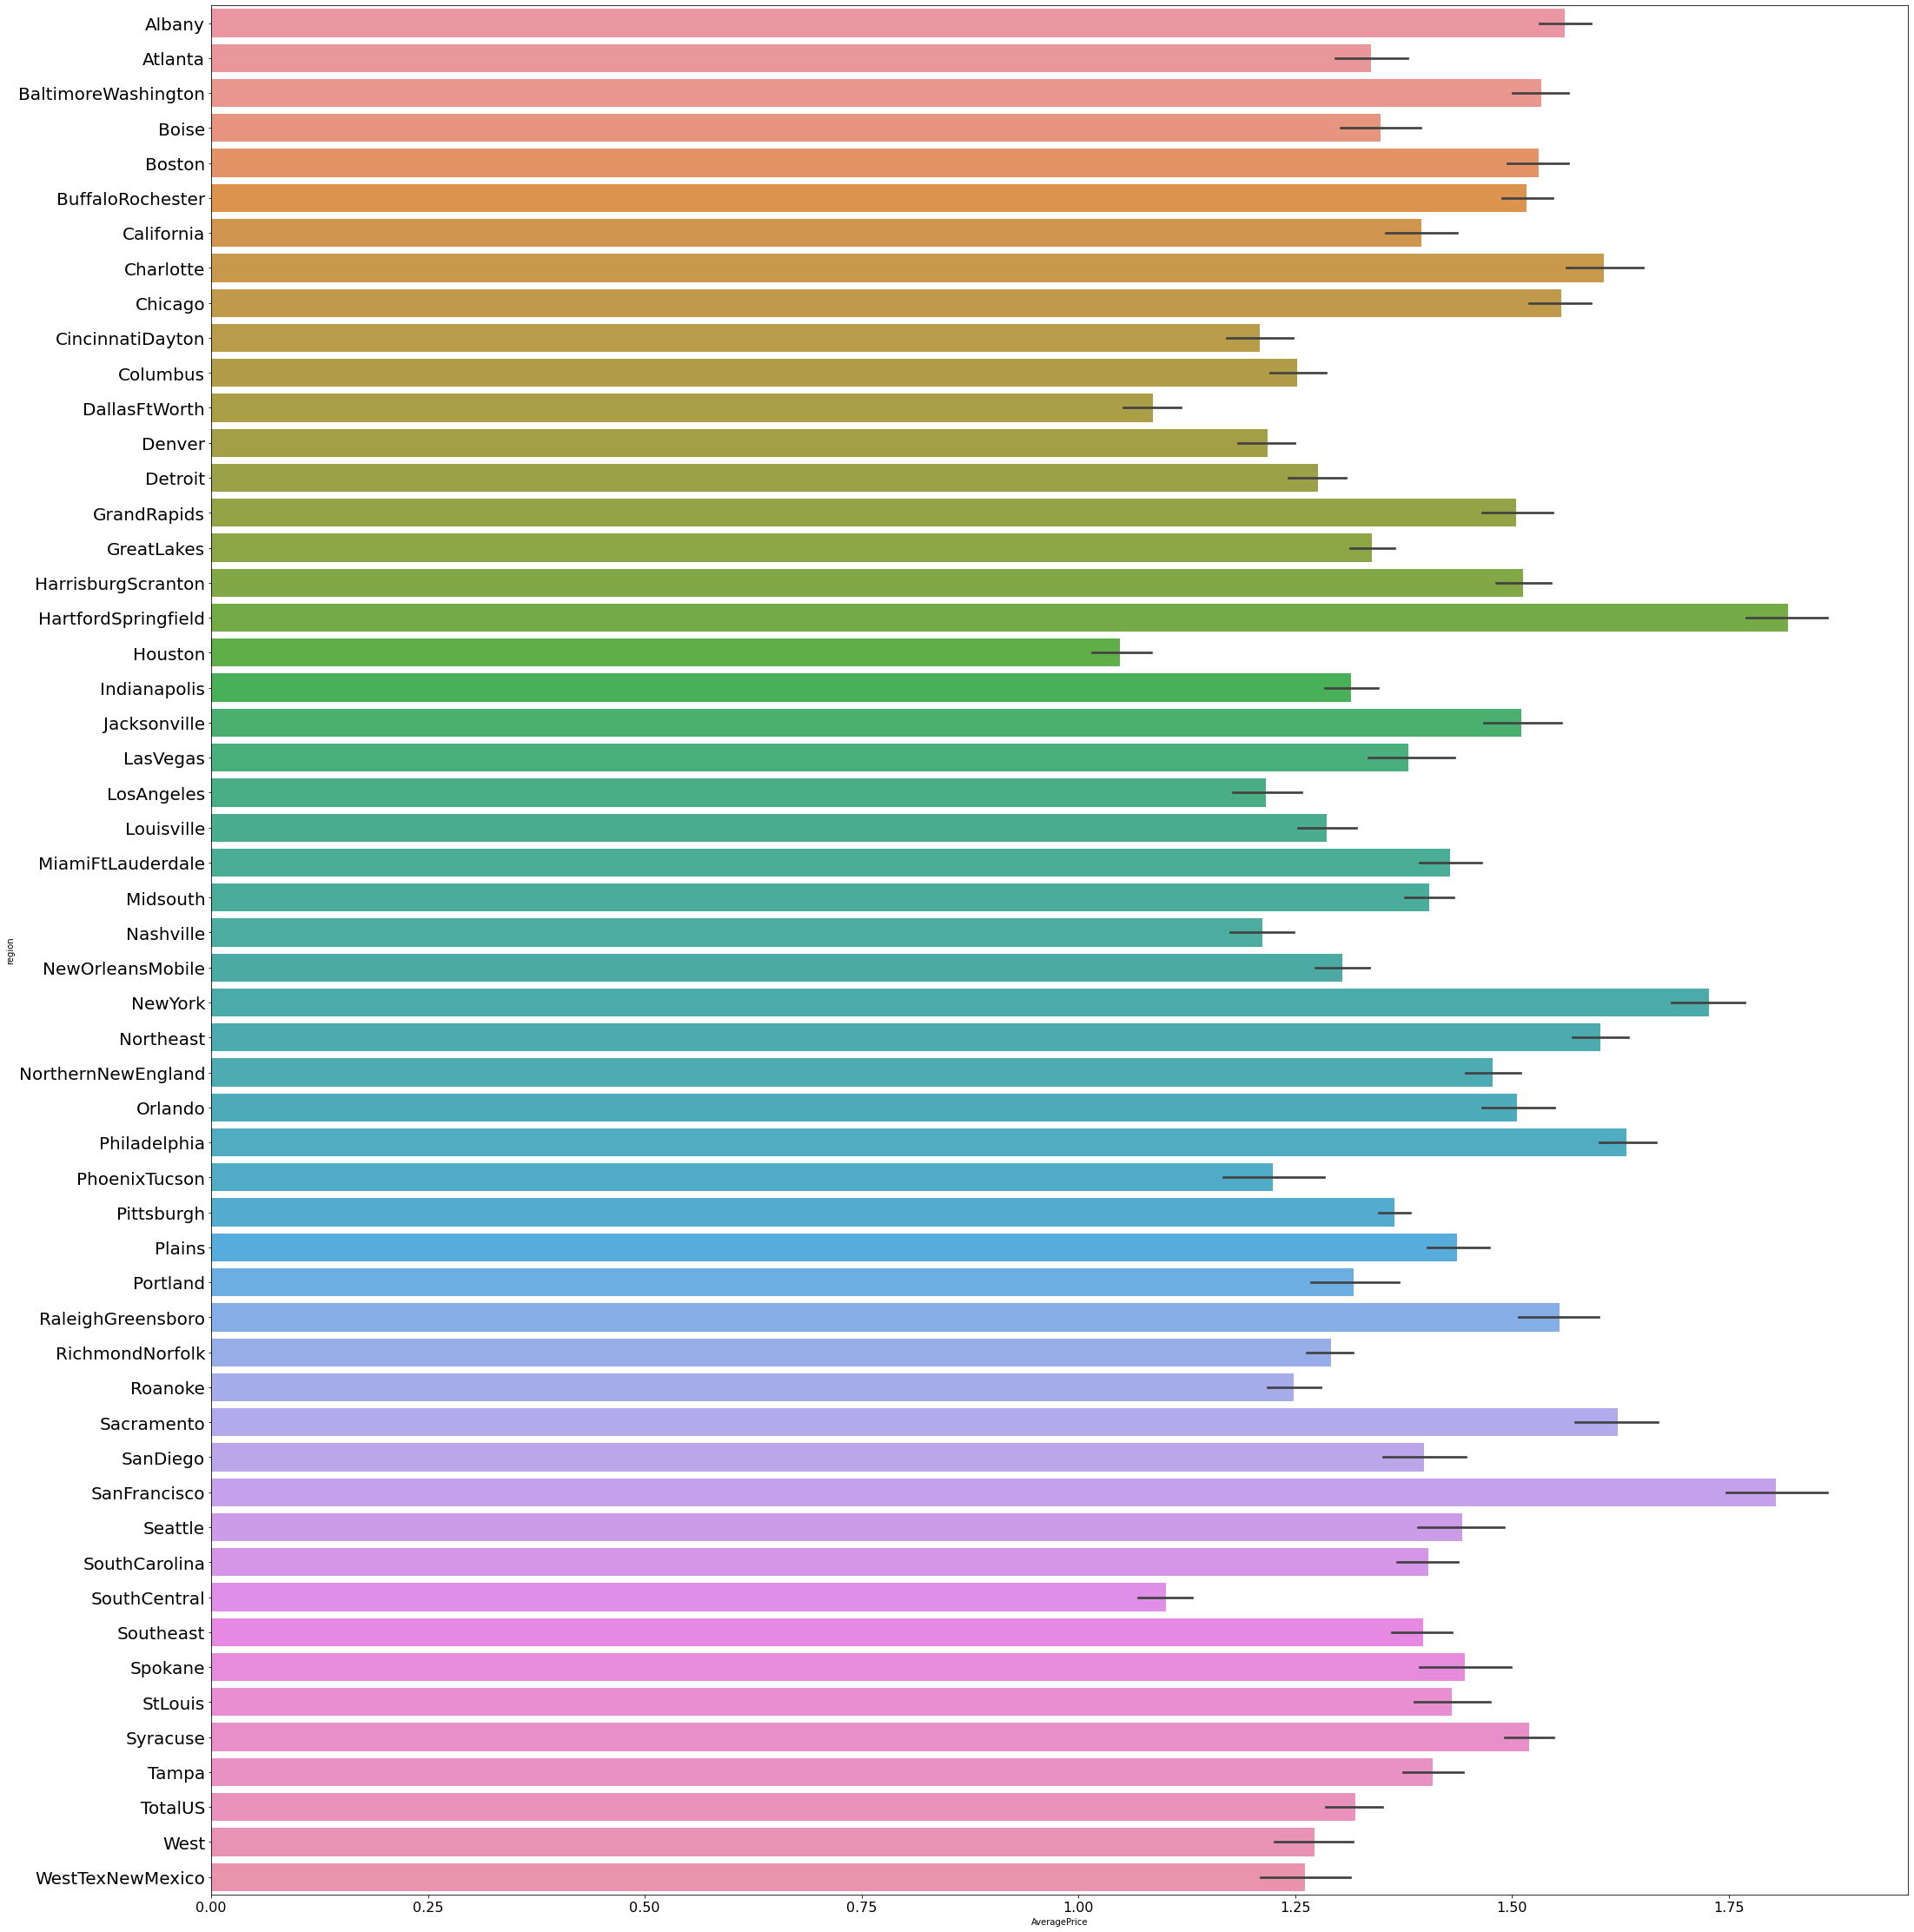

In [17]:
# Average Price distribution region wise.
plt.figure(figsize=[35,40])
sns.barplot(x='AveragePrice', y='region', data = df, orient='h')
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.show()

Observations:
1. The average price of Avocado is highest in the region 'Hartford–Springfield'.
2.The average price of Avocado is lowest in the region 'Houston'.

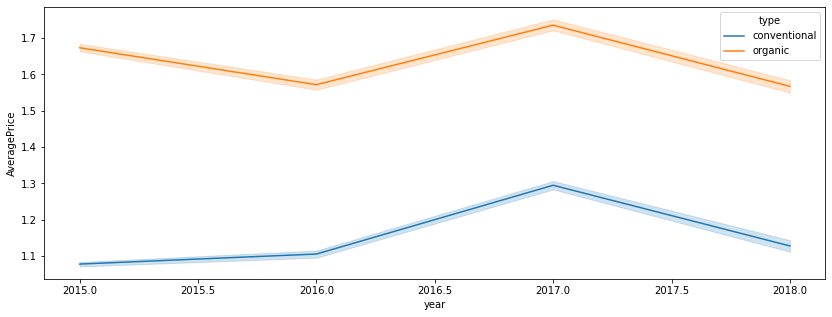

In [18]:
#type-wise average price distribution of Avocado yearly
plt.figure(figsize=[14,5])
sns.lineplot(x='year',y='AveragePrice', hue='type', data=df)
plt.show()

Price of organic avocado is higher than convetional.

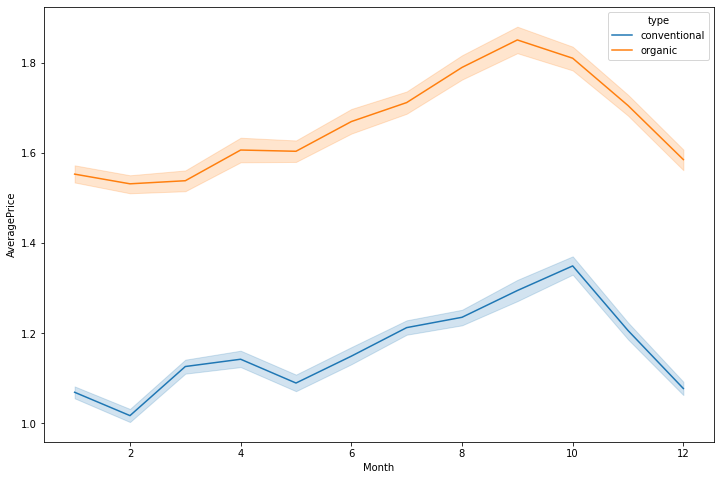

In [19]:
#type-wise average price distribution of Avocado monthly
plt.figure(figsize=[12,8])
sns.lineplot(x='Month',y='AveragePrice', hue='type', data=df)
plt.show()

Observations:
1. The price of organic Avocado is higher than convetional type Avocado.
2. The above grapgh shows that there is continuous increase in the average price of the Avocado from the May month for both the types.
3. For organic avacado the peak value of the average price is in the month of September and for the conventional type it is in the month of October.
4. The average price is continuously increasing after the May month till October month for the convetional type Avocado.
5. The average price is continuously increasing after the May month till September month for the organic type Avocado.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'PLU 4046 sold'}>,
        <AxesSubplot:title={'center':'PLU 4225 sold'}>],
       [<AxesSubplot:title={'center':'PLU 4770 sold'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

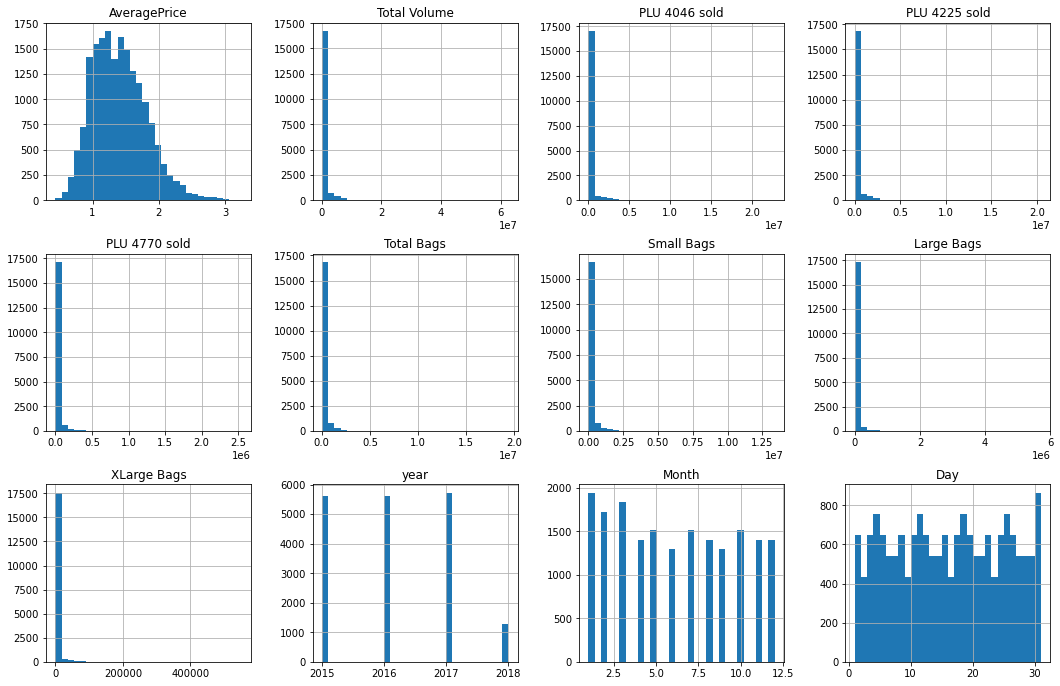

In [20]:
# checking normal distribution
df.hist(figsize=[18,16], grid=True, layout=(4,4), bins=30)

In [21]:
# Checking for the data description
df.describe()

,AveragePrice,Total Volume,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


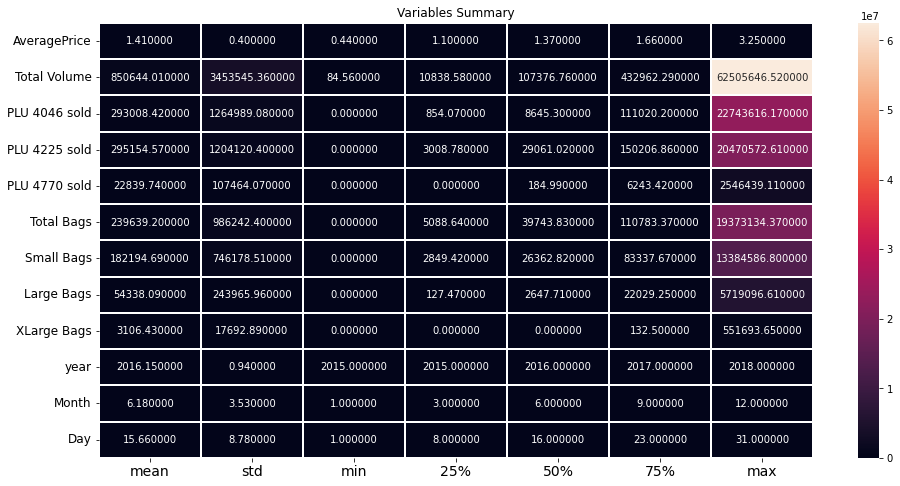

In [22]:
# Showing description using heatmap
plt.figure(figsize=[16,8])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Variables Summary')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [23]:
# checking correlation
df.corr()

,AveragePrice,Total Volume,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
PLU 4046 sold,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
PLU 4225 sold,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
PLU 4770 sold,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


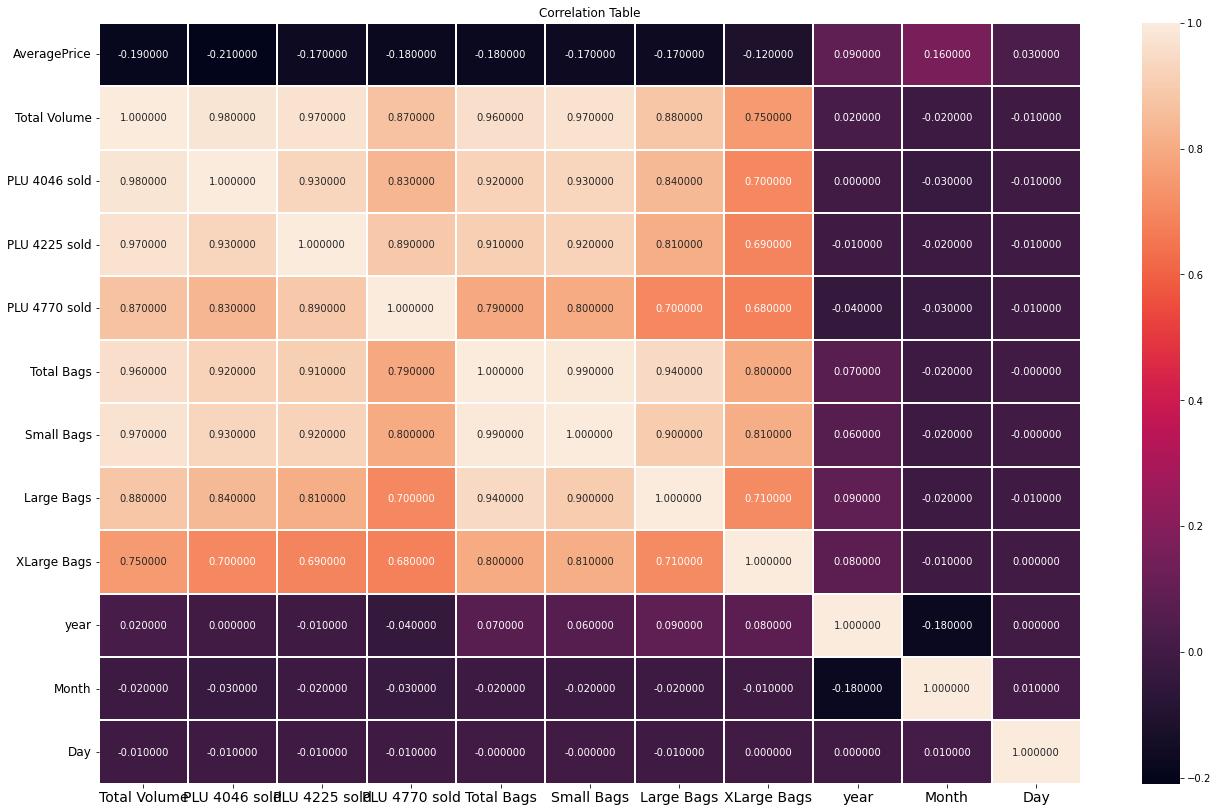

In [24]:
# Plotting heatmap for the correlation table

plt.figure(figsize=[22,14])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Correlation Table')
plt.show()


Observations:
1. 'Month' column has the highest correlation with the target column (16%).
2. 'PLU_4046' column has the lowest correlation with the target column (-20%).

# Label Encoding

In [25]:
# LabelEncoder on 'type' column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['type'].drop_duplicates())
le.classes_
df['type'] = le.transform(df['type'])

In [26]:
# LabelEncoder on 'region' column

le.fit(df['region'])
le.classes_
df['region'] = le.transform(df['region'])

In [27]:
df.head()

,AveragePrice,Total Volume,PLU 4046 sold,PLU 4225 sold,PLU 4770 sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [28]:
df.dtypes

AveragePrice     float64
Total Volume     float64
PLU 4046 sold    float64
PLU 4225 sold    float64
PLU 4770 sold    float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type               int32
year               int64
region             int32
Month              int64
Day                int64
dtype: object

We can see that the columns having the categorical data is converted to numerical values.

# Outliers Analysis

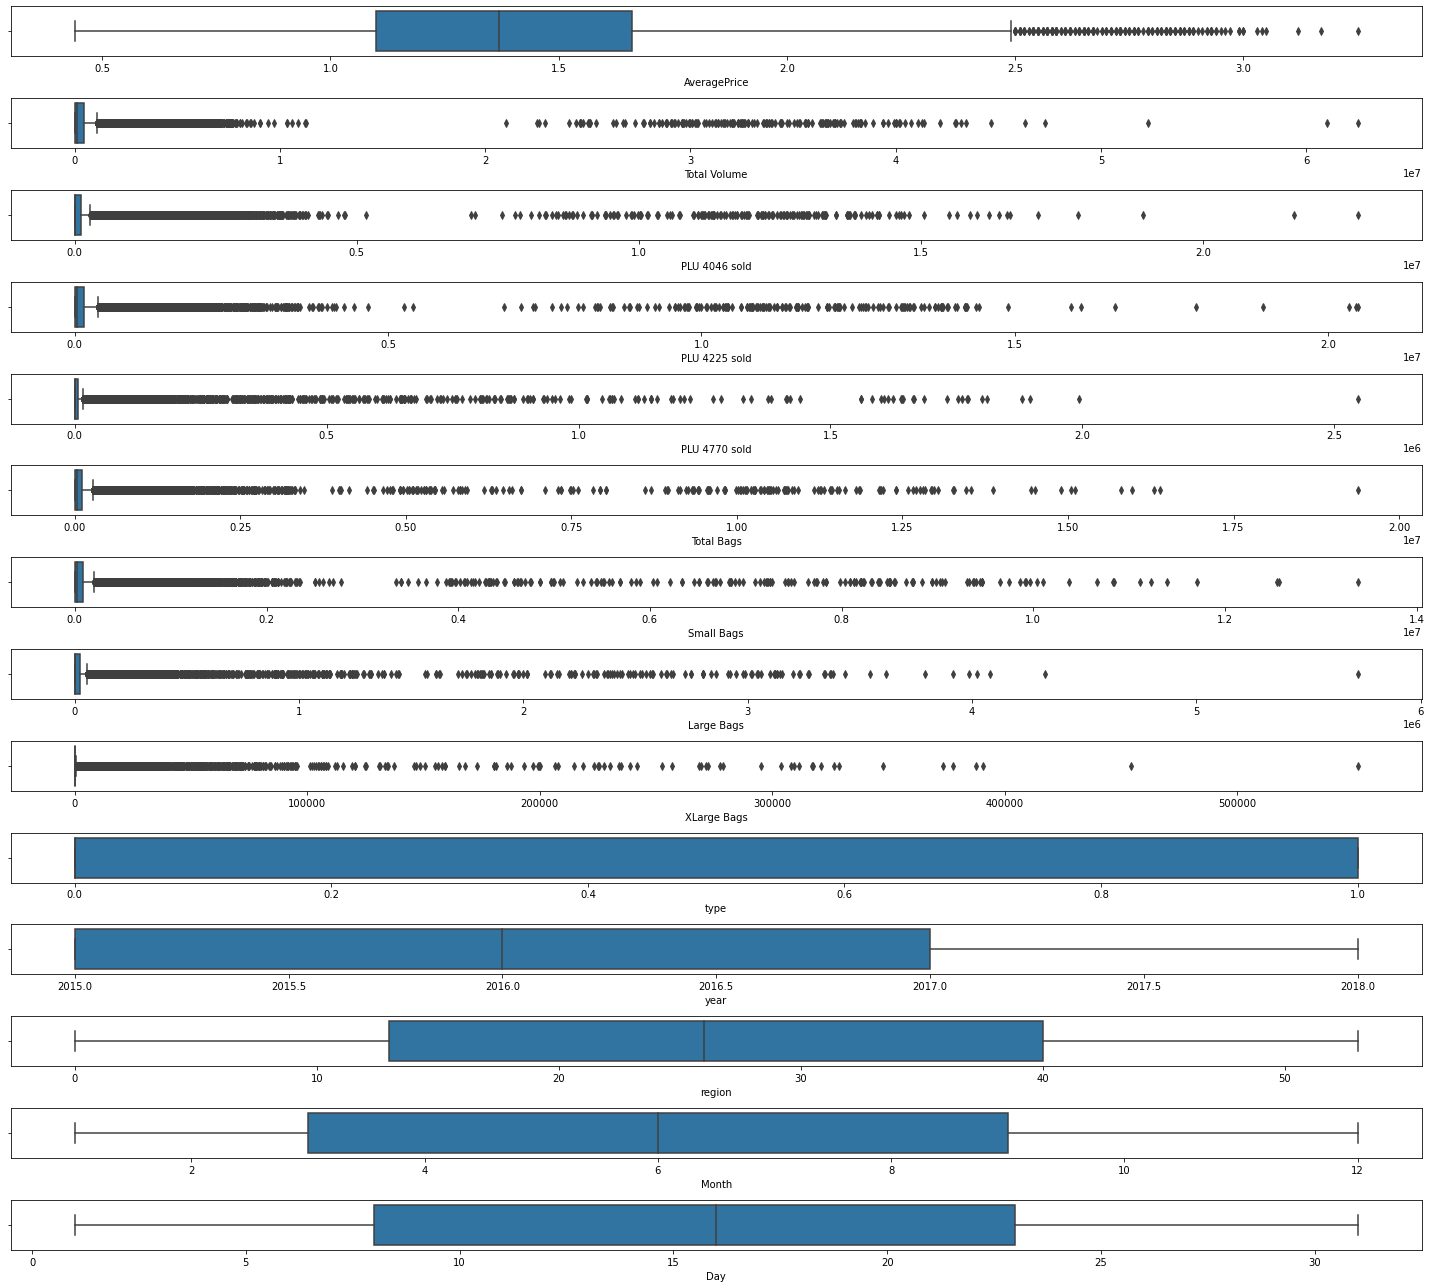

In [29]:
# Plotting boxplot to check the outliers
fig, axs = plt.subplots(14, figsize=[20,18])

plt1 = sns.boxplot(df['AveragePrice'], ax=axs[0])
plt2 = sns.boxplot(df['Total Volume'], ax = axs[1])
plt3 = sns.boxplot(df['PLU 4046 sold'], ax = axs[2])
plt4 = sns.boxplot(df['PLU 4225 sold'], ax=axs[3])
plt5 = sns.boxplot(df['PLU 4770 sold'], ax = axs[4])
plt6 = sns.boxplot(df['Total Bags'], ax= axs[5])
plt7 = sns.boxplot(df['Small Bags'], ax = axs[6])
plt8 = sns.boxplot(df['Large Bags'], ax= axs[7])
plt9 = sns.boxplot(df['XLarge Bags'], ax = axs[8])
plt10 = sns.boxplot(df['type'], ax = axs[9])
plt11 = sns.boxplot(df['year'], ax = axs[10])
plt12 = sns.boxplot(df['region'], ax = axs[11])
plt13 = sns.boxplot(df['Month'], ax =axs[12])
plt14 = sns.boxplot(df['Day'], ax =axs[13])

plt.tight_layout()

Observations:
1. Columns 'type', 'Year', 'region', 'Month', and 'Day' do not contain outliers.
2. All other columns have outliers present.

In [30]:
# check for skewness
df.skew()

AveragePrice      0.580303
Total Volume      9.007687
PLU 4046 sold     8.648220
PLU 4225 sold     8.942466
PLU 4770 sold    10.159396
Total Bags        9.756072
Small Bags        9.540660
Large Bags        9.796455
XLarge Bags      13.139751
type              0.000329
year              0.215339
region            0.000030
Month             0.106617
Day               0.014310
dtype: float64

Columns having skewness:
1. Total Volume
2. PLU_4046
3. PLU_4225
4. PLU_4770
5. Total Bags
6. Small Bags
7. Large Bags
8. XLarge Bags

# Outliers Removal

zscore technique

In [31]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z.shape

(18249, 14)

In [32]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [33]:
df_new=df[(z<3).all(axis=1)]

print(df.shape)
print(df_new.shape)


(18249, 14)
(17651, 14)


In [34]:
# dividing dataset into X and y
X=df_new.drop(['AveragePrice'], axis = 1)
y = df_new['AveragePrice']

In [35]:
# removing skewness using power transformer
from sklearn.preprocessing import power_transform

X=power_transform(X)
X

array([[-0.07532391, -0.65742071,  0.35142978, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.14749743, -0.77717852,  0.26951276, ..., -2.01058988,
         1.49138301,  0.53822879],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

# Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.07532391, -0.65742071,  0.35142978, ..., -2.01058988,
         1.49138301,  1.22756521],
       [-0.14749743, -0.77717852,  0.26951276, ..., -2.01058988,
         1.49138301,  0.53822879],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -2.01058988,
         1.49138301, -0.21895878],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.57828237,
        -1.64028838,  0.64019459],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.57828237,
        -1.64028838, -0.10529902],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.57828237,
        -1.64028838, -0.9581001 ]])

# Model Training

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.45,random_state=45)

# 1. Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
print(f"Linear coefficients : {lr.coef_}")
print(f"Intercept : {lr.intercept_}")

Linear coefficients : [-0.28420598  0.02007718  0.26264998  0.02917481 -0.2526709   0.19762619
 -0.03440442  0.00030939  0.18428969  0.0982439   0.00924298  0.07555432
  0.00884467]
Intercept : 1.4054234325295036


In [40]:
lr_pred=lr.predict(X_test)
lr_pred

array([1.28589226, 1.59375623, 1.26665038, ..., 1.46536785, 1.22664435,
       1.63787063])

# 2. Ridge Regression

In [41]:
# Importing the library
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.5)
rid.fit(X_train,y_train)

print(f"Ridge Coefficients : {rid.coef_}")
print(f"Intercept : {rid.intercept_}")

Ridge Coefficients : [-0.28348115  0.01988283  0.26229281  0.02919326 -0.2524851   0.19725428
 -0.03449761  0.00032047  0.1842934   0.09822678  0.00925208  0.07554781
  0.0088458 ]
Intercept : 1.4054226538787413


In [42]:
rid_pred = rid.predict(X_test)

rid_pred

array([1.28599554, 1.59370953, 1.26670621, ..., 1.46531737, 1.22655724,
       1.63790234])

# 3. Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
dt_pred=dt.predict(X_test)
dt_pred

array([1.18, 1.01, 1.2 , ..., 1.75, 1.29, 1.93])

# 4. KNeighborsRegressor

In [45]:
from sklearn.neighbors import  KNeighborsRegressor

knn= KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [46]:
knn_pred=knn.predict(X_test)
knn_pred

array([1.15 , 1.805, 1.345, ..., 1.715, 1.345, 1.59 ])

# 4. RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=2,random_state=43)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=43)

In [48]:
rf_pred=rf.predict(X_test)
rf_pred

array([1.10889018, 1.48123194, 1.48123194, ..., 1.71191172, 1.27360277,
       1.71191172])

# Mean Absolute Error

In [49]:
from sklearn.metrics import mean_absolute_error

print(' Mean Absolute Error for LinearRegression is ', mean_absolute_error(y_test, lr_pred),
      '\n Mean Absolute Error for RidgeRegression is',mean_absolute_error(y_test,rid_pred),
     '\n Mean Absolute Error for DecisionTreeRegressor is ', mean_absolute_error(y_test, dt_pred),
     '\n Mean Absolute Error for KNeighborsRegressor is ', mean_absolute_error(y_test, knn_pred),
      '\n Mean Absolute Error for RandomForestRegressor is ', mean_absolute_error(y_test, rf_pred))

 Mean Absolute Error for LinearRegression is  0.19944831338946667 
 Mean Absolute Error for RidgeRegression is 0.19945132200540897 
 Mean Absolute Error for DecisionTreeRegressor is  0.14135968777539967 
 Mean Absolute Error for KNeighborsRegressor is  0.13717235301523353 
 Mean Absolute Error for RandomForestRegressor is  0.22487932050123366


Mean Absolute Error for Decision Tree is lowest

# Root Mean Squared Error

In [50]:
from sklearn import metrics
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, lr_pred))
rmse_RID = np.sqrt(metrics.mean_squared_error(y_test, rid_pred))
rmse_DT = np.sqrt(metrics.mean_squared_error(y_test, dt_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, knn_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))

print('Root Mean Squared Error for LinearRegression is ', rmse_LR)
print('Root Mean Squared Error for RidgeRegression is ', rmse_RID)
print('Root Mean Squared Error for DecisionTreeRegressor is ', rmse_DT)
print('Root Mean Squared Error for KNeighborsRegressor is ', rmse_KNN)
print('Root Mean Squared Error for RandomForestRegressor is ', rmse_RF)

Root Mean Squared Error for LinearRegression is  0.2520581130248848
Root Mean Squared Error for RidgeRegression is  0.2520622034309396
Root Mean Squared Error for DecisionTreeRegressor is  0.2110351697715898
Root Mean Squared Error for KNeighborsRegressor is  0.19273796382454608
Root Mean Squared Error for RandomForestRegressor is  0.2869786045338509


Root Mean Squared Error is least for KNeighborsRegressor.

# R2 Score

In [51]:
from sklearn.metrics import r2_score

print(' R2_Score for LinearRegression is ', r2_score(y_test, lr_pred), '\n R2_Score for LinearRegression is ', r2_score(y_test, rid_pred),'\n R2_Score for DecisionTreeRegressor is ', r2_score(y_test, dt_pred),
      '\n R2_Score for KNeighborsRegressor is ', r2_score(y_test, knn_pred), '\n R2_Score for RandomForestRegressor is ', r2_score(y_test, rf_pred))

 R2_Score for LinearRegression is  0.5774126072378879 
 R2_Score for LinearRegression is  0.57739889160672 
 R2_Score for DecisionTreeRegressor is  0.7037728561880128 
 R2_Score for KNeighborsRegressor is  0.7529131071064937 
 R2_Score for RandomForestRegressor is  0.45220985611820574


the best R2_Score is for KNeighborsRegressor 

So, as per the above three observations we can say that the best model is KNeighborsRegressor.

# Model Saving

In [52]:
import pickle
filename = 'Acovado.pkl'
pickle.dump(knn, open(filename, 'wb'))

# Conclusion

In [53]:
a = np.array(y_test)
predicted = np.array(knn.predict(X_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,1.16,1.150
1,2.16,1.805
2,1.23,1.345
3,1.43,1.295
4,0.93,0.915
...,...,...
7938,1.56,1.520
7939,1.40,1.390
7940,1.73,1.715
7941,1.03,1.345
